# Modelo de Regressão (CinemaTicketRef Dataset)

### Objetivo:
Tentar prever o preço total de vendas com base em outras variáveis

In [1150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sklearn

pd.set_option('float_format', '{:f}'.format)

df = pd.read_csv('datasets/cinematicket_ref.csv', sep=",", header=0)

display(df.head(10))

# removendo string data, pois so tem filmes de 2018, e temos month, quarter, day em outras colunas
df = df.drop(['date'], axis=1)


,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.260000,150000.000000,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.080000,80000.000000,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.000000,80000.000000,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.010000,100000.000000,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.670000,80000.000000,15,89.982004,2018-05-05,5,2,5
5,1492,71,1050000,7,0,3,0.980000,150000.000000,7,714.285714,2018-05-05,5,2,5
6,1492,163,1020000,10,0,3,7.690000,102000.000000,10,130.039012,2018-05-05,5,2,5
7,1492,450,750000,5,0,3,1.570000,150000.000000,5,318.471338,2018-05-05,5,2,5
8,1492,51,750000,11,0,2,0.950000,68181.818182,11,1157.894737,2018-05-05,5,2,5
9,1492,522,600000,4,0,3,1.550000,150000.000000,4,258.064516,2018-05-05,5,2,5


In [1151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  month         142524 non-null  int64  
 11  quarter       142524 non-null  int64  
 12  day           142524 non-null  int64  
dtypes: float64(3), int64(10)
memory usage: 14.1 MB


In [1152]:
display(df.describe())

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,12347275.407531,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,6.776852,2.634721,16.112585
std,36.184450,159.701229,30654858.289367,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,2.195843,0.809692,8.949471
min,1471.000000,32.000000,20000.000000,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1260000.000000,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3720000.000000,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,11100000.000000,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1262819994.000000,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


### Tratamento de dados

procurando celulas vazias

In [1153]:

missing_values_count = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

print('porcentagem de valores faltando', (total_missing/total_cells) * 100)

print(df.isnull().sum())

porcentagem de valores faltando 0.013493004147209754
film_code         0
cinema_code       0
total_sales       0
tickets_sold      0
tickets_out       0
show_time         0
occu_perc       125
ticket_price      0
ticket_use        0
capacity        125
month             0
quarter           0
day               0
dtype: int64


preenchendo as celulas vazias com a media de cada coluna

In [1154]:
# vamos preencher celulas vazias com a media de cada coluna

mean_occurrence = df['occu_perc'].mean()
mean_capacity = df['capacity'].mean()

df['occu_perc'].fillna(mean_occurrence, inplace=True)
df['capacity'].fillna(mean_capacity, inplace=True)

print(df.isnull().sum())

film_code       0
cinema_code     0
total_sales     0
tickets_sold    0
tickets_out     0
show_time       0
occu_perc       0
ticket_price    0
ticket_use      0
capacity        0
month           0
quarter         0
day             0
dtype: int64


procurando valores repetidos

In [1155]:
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

print(df.duplicated().sum())


106
0


Quantidade de 0 e valores menores que ele

In [1156]:
df.lt(0).sum()

film_code        0
cinema_code      0
total_sales      0
tickets_sold     0
tickets_out      0
show_time        0
occu_perc        0
ticket_price     0
ticket_use      61
capacity        54
month            0
quarter          0
day              0
dtype: int64

removendo tickets out

In [1157]:
df = df.drop(['tickets_out'], axis=1)
df

,film_code,cinema_code,total_sales,tickets_sold,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
0,1492,304,3900000,26,4,4.260000,150000.000000,26,610.328638,5,2,5
1,1492,352,3360000,42,5,8.080000,80000.000000,42,519.801980,5,2,5
2,1492,489,2560000,32,4,20.000000,80000.000000,32,160.000000,5,2,5
3,1492,429,1200000,12,1,11.010000,100000.000000,12,108.991826,5,2,5
4,1492,524,1200000,15,3,16.670000,80000.000000,15,89.982004,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...
142519,1569,495,1320000,22,2,3.860000,60000.000000,22,569.948187,11,4,4
142520,1569,474,1200000,15,1,65.220000,80000.000000,15,22.999080,11,4,4
142521,1569,524,1060000,8,3,9.200000,132500.000000,8,86.956522,11,4,4
142522,1569,529,600000,5,2,5.000000,120000.000000,5,100.000000,11,4,4


removendo valores negativos

In [1158]:
df_filtered1 = df[ (df['ticket_use'] < 0) ].index
df.drop(df_filtered1, inplace=True)
df_filtered2 = df[ (df['capacity'] < 0) ].index
df.drop(df_filtered2, inplace=True)
display(df.describe())

,film_code,cinema_code,total_sales,tickets_sold,show_time,occu_perc,ticket_price,ticket_use,capacity,month,quarter,day
count,142303.000000,142303.000000,142303.000000,142303.000000,142303.000000,142303.000000,142303.000000,142303.000000,142303.000000,142303.000000,142303.000000,142303.000000
mean,1518.995580,320.290465,12344280.761396,140.129871,3.932356,19.969464,81238.541125,139.916924,854.976741,6.778522,2.635510,16.107067
std,36.182202,159.665910,30648588.038012,279.818411,3.056762,22.641565,33237.051484,279.609585,952.684489,2.193915,0.808551,8.950265
min,1471.000000,32.000000,20000.000000,1.000000,1.000000,0.030000,483.870968,0.000000,10.000000,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1270000.000000,18.000000,2.000000,3.760000,60000.000000,18.000000,279.329609,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3720000.000000,50.000000,3.000000,10.370000,79467.821782,50.000000,526.315789,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,11100000.000000,143.000000,5.000000,28.190000,100000.000000,143.000000,1038.329097,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1262819994.000000,8499.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,11.000000,4.000000,31.000000


Histograma dos dados

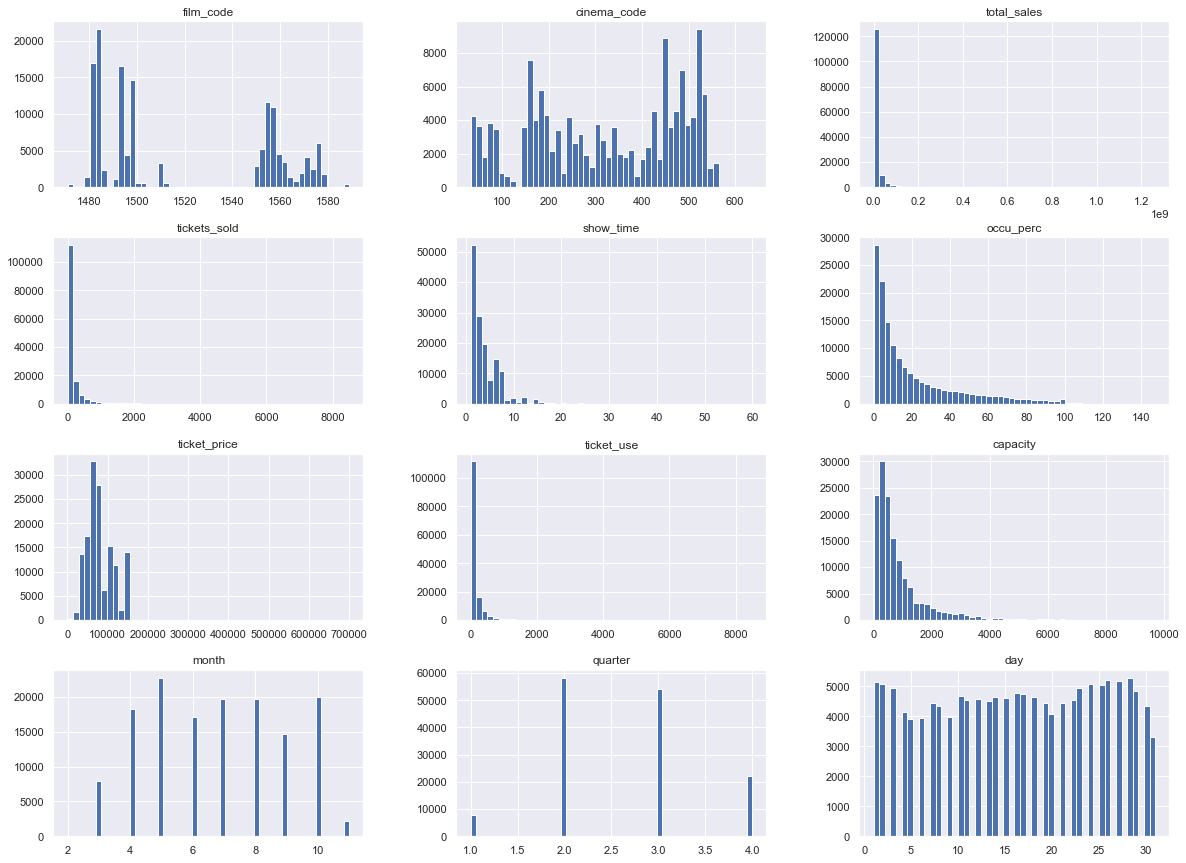

In [1159]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
plt.show()

### Observando mais sobre o total sales

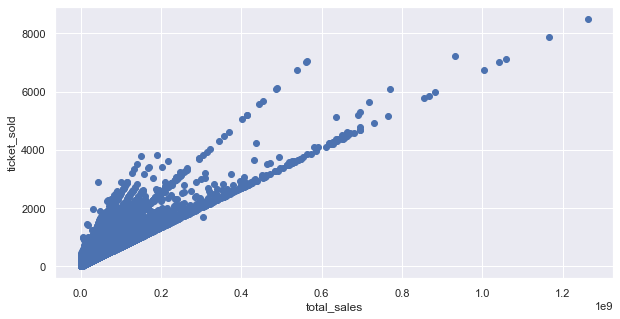

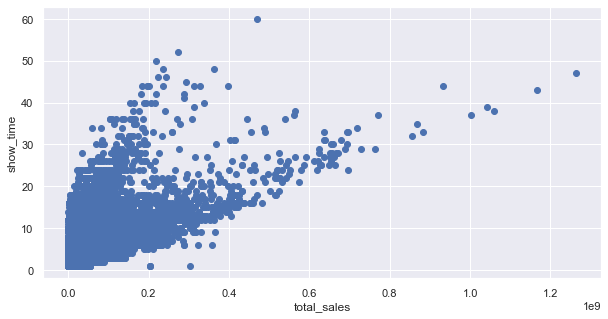

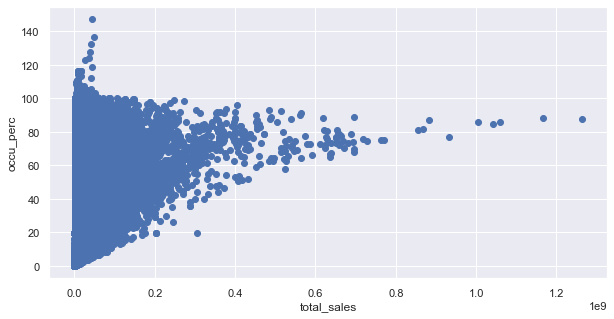

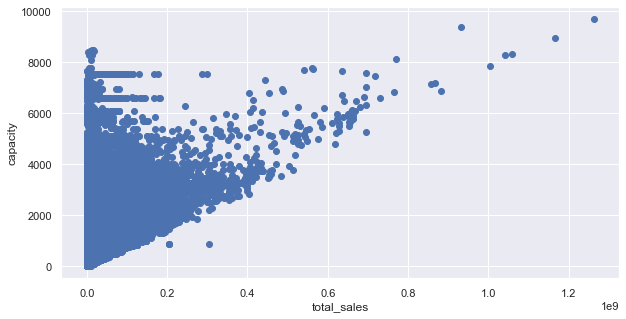

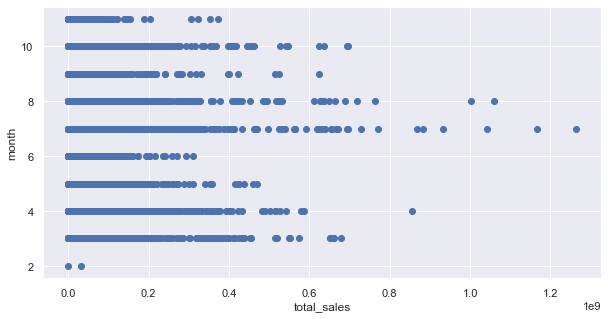

In [1160]:
plt.figure(figsize = (10,5))
plt.scatter(df['total_sales'], df['tickets_sold'])
plt.xlabel('total_sales')
plt.ylabel('ticket_sold')
plt.show()

plt.figure(figsize = (10,5))
plt.scatter(df['total_sales'], df['show_time'])
plt.xlabel('total_sales')
plt.ylabel('show_time')
plt.show()

plt.figure(figsize = (10,5))
plt.scatter(df['total_sales'], df['occu_perc'])
plt.xlabel('total_sales')
plt.ylabel('occu_perc')
plt.show()

plt.figure(figsize = (10,5))
plt.scatter(df['total_sales'], df['capacity'])
plt.xlabel('total_sales')
plt.ylabel('capacity')
plt.show()

plt.figure(figsize = (10,5))
plt.scatter(df['total_sales'], df['month'])
plt.xlabel('total_sales')
plt.ylabel('month')
plt.show()

### Existem cinemas que fazem mais sucesso com determinado filme do que outros?

      film_code  cinema_code  total_sales
0          1471           56     23040000
1          1471           73    292940000
2          1471          162      6270000
3          1471          163    129300000
4          1471          210     42360000
...         ...          ...          ...
4882       1589          448     33990000
4883       1589          489      5885000
4884       1589          524      6940000
4885       1589          526      3120000
4886       1589          553      1950000

[4887 rows x 3 columns]


C:\Users\thiago\AppData\Local\Temp\ipykernel_9664\1179906098.py:22: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



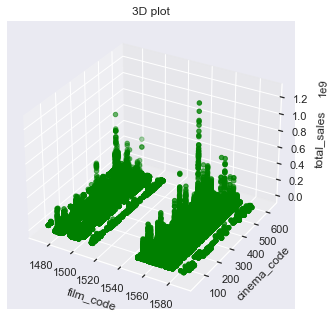

In [1161]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

df_new = df.groupby(['film_code', 'cinema_code']).agg({'total_sales': 'sum',}).reset_index()

print(df_new)

def plot_3d(df, x, y, z, title):
    fig = plt.figure(figsize=(150, 100))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[x], df[y], df[z], c='r', marker='o')
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_zlabel(z)
    plt.title(title)
    plt.show()

# plot_3d(df_new, 'film_code', 'cinema_code', 'total_sales', 'total_sales x film_code x cinema_code')


fig = plt.figure()
ax = Axes3D(fig)

# creating the plot
plot_geeks = ax.scatter(df['film_code'], df['cinema_code'], df['total_sales'], color='green')

# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('film_code')
ax.set_ylabel('cinema_code')
ax.set_zlabel('total_sales')

# displaying the plot
plt.show()

#### tentando fazer em 2d com apenas um filme

# def get_total_sales(df, film_codes):
#     df_new = df[df['film_code'].isin(film_codes)]
#     df_new = df_new.groupby(['cinema_code']).agg({'total_sales': 'sum',}).reset_index()
#     return df_new

# def plot_2d(df, x, y, title, color):
#     fig = plt.figure(figsize=(10, 10))
#     ax = fig.add_subplot(111)
#     ax.scatter(df[x], df[y], c=color, marker='o')
#     ax.set_xlabel(x)
#     ax.set_ylabel(y)
#     plt.title(title)
#     plt.show()

# def get_random_film_codes(df):
#     film_codes = df['film_code'].unique()
#     np.random.shuffle(film_codes)
#     return film_codes[:5]

# colors = ['green', 'red', 'blue', 'yellow', 'black']
# film_codes = get_random_film_codes(df)
# i = 0
# for el in film_codes:
#     df_film_code = get_total_sales(df_new, [el])
#     plot_2d(df_film_code, 'cinema_code', 'total_sales', 'total_sales x cinema_code on film_code %s' %(el), colors[i])
#     # i+=1



# 4420


### Boxplots

<AxesSubplot:>

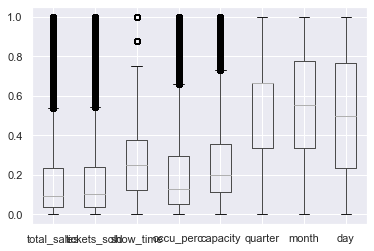

In [1162]:
from pydoc import describe
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from numpy import percentile

# removendo outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

scaled_df.boxplot(
    column=['total_sales', 'tickets_sold', 'show_time',  'occu_perc', 'capacity', 'quarter', 'month' , 'day'])


### Matriz de correlação

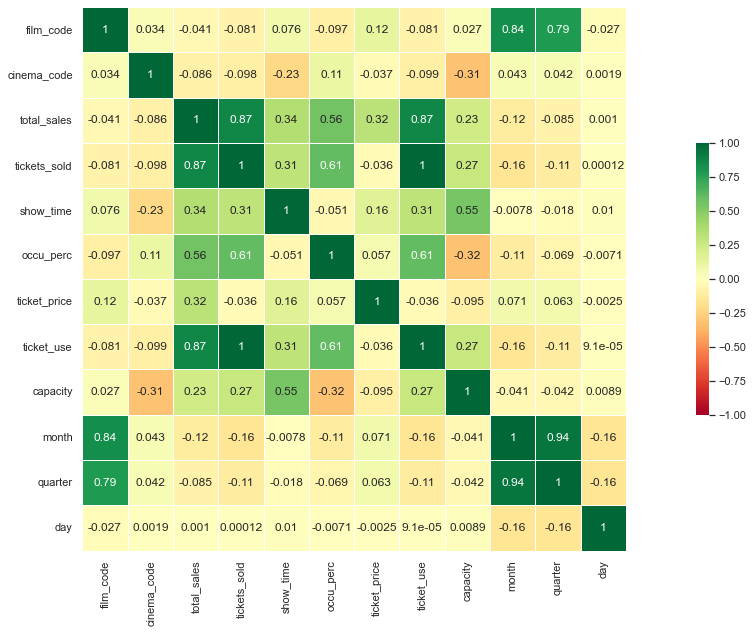

In [1163]:
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(25, 10))
corr = df.corr()

sns.heatmap(corr, annot=True, cmap='RdYlGn', vmax=1,
        vmin=-1, center=0, square=True,
        linewidth=.5, cbar_kws={"shrink":.5})

plt.show()


### Removendo Ticket_use pela sua multicolinearidade

In [1164]:
# df = df.drop(['ticket_use'], axis=1)
# df

# 

In [1165]:
cinema={}

# ['film_code', 'cinema_code', 'ticket_price', 'show_time',  'occu_perc', 'capacity', 'quarter', 'month' , 'day']
cinema["features"] = scaled_df[['ticket_price', 'show_time',  'occu_perc', 'capacity', 'quarter', 'month' , 'day']]
cinema["target"] = scaled_df['total_sales']

print(cinema['features'].shape)
print(cinema['target'].shape)

display(cinema['features'])
display(cinema['target'])

(109276, 7)
(109276,)


,ticket_price,show_time,occu_perc,capacity,quarter,month,day
0,0.965558,0.375000,0.065009,0.277232,0.333333,0.333333,0.133333
1,0.513506,0.500000,0.123996,0.235427,0.333333,0.333333,0.133333
2,0.513506,0.375000,0.308061,0.069270,0.333333,0.333333,0.133333
3,0.642664,0.000000,0.169240,0.045714,0.333333,0.333333,0.133333
4,0.513506,0.250000,0.256640,0.036936,0.333333,0.333333,0.133333
...,...,...,...,...,...,...,...
109271,0.865102,0.250000,0.369827,0.030017,1.000000,1.000000,0.100000
109272,0.384348,0.125000,0.058833,0.258584,1.000000,1.000000,0.100000
109273,0.852545,0.250000,0.141291,0.035539,1.000000,1.000000,0.100000
109274,0.771821,0.125000,0.076436,0.041562,1.000000,1.000000,0.100000


0        0.150271
1        0.129357
2        0.098373
3        0.045701
4        0.045701
           ...   
109271   0.092951
109272   0.050349
109273   0.040279
109274   0.022463
109275   0.008908
Name: total_sales, Length: 109276, dtype: float64

Utilizando o modelo Gaussiano podemos observar que 68% do total sales fica de 0.05228 a 0.5131

In [1166]:

print(scaled_df['total_sales'].describe())

print(np.mean(scaled_df['total_sales']) - np.std(scaled_df['total_sales']))
print(np.mean(scaled_df['total_sales'] + np.std(scaled_df['total_sales'])))

count   109276.000000
mean         0.175783
std          0.201429
min          0.000000
25%          0.036406
50%          0.095275
75%          0.236251
max          1.000000
Name: total_sales, dtype: float64
-0.025644941025695228
0.37721159030189017


### Aplicando Regressão linear

Mean squared error: 0.016159
Mean absolute error: 0.086359
Root Mean squared error: 0.127117
R2 score: 0.608304
Coefficients: 
 [ 0.29818221  0.09527709  0.61980891  0.39310656  0.07234111 -0.12023236
 -0.00438773]
Intercept: 
 -0.20640325501668425
Score: 
 0.6083036135180866
scores: 
 [-0.01551893 -0.01666369 -0.01692112 -0.01742221 -0.015274   -0.01618795
 -0.01513336]
scores mean:  -0.01616018089385386
scores std:  0.0008173917735316463


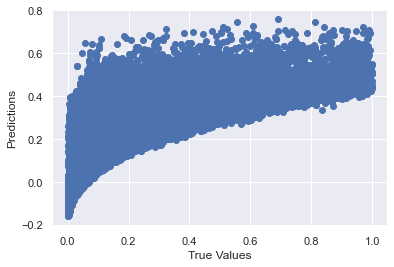

In [1167]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(cinema['features'], cinema['target'], test_size=0.3)

# train the model
model = LinearRegression()
model.fit(x_train, y_train)

# make predictions
y_pred = model.predict(x_test)

# evaluate the model
print('Mean squared error: %f' % mean_squared_error(y_test, y_pred)) # dif entre valor predito e valor real elevar ao quadrado, soma todos os erros e divide pelo numero de amotras
print('Mean absolute error: %f' % mean_absolute_error(y_test, y_pred)) # quanto que em media o modelo esta errando o valor do total de sales
print('Root Mean squared error: %f' %(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 score: %f' % r2_score(y_test, y_pred))


print('Coefficients: \n', model.coef_)
print('Intercept: \n', model.intercept_)
print('Score: \n', model.score(x_test, y_test))

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, x_test, y_test, cv=7, scoring='neg_mean_squared_error')
print('scores: \n', scores)

print('scores mean: ', scores.mean())
print('scores std: ', scores.std())

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

### Utilizando outros modelos de Regressão Linear para verificar o resultado

In [1168]:
def norma_l2(X):
    X = X.astype(float)
    X = X - np.mean(X, axis=0)
    X = X / np.linalg.norm(X, axis=0)
    return X

### Lasso Regression

In [1169]:
from sklearn.linear_model import Lasso

ls = Lasso(alpha=0.01)
ls_scores = cross_val_score(ls, norma_l2(cinema["features"]), cinema["target"], cv=7, error_score="raise")

print('ls score: ', ls_scores.mean())


ls score:  -0.02066815992551598


### Ridge Regression

In [1170]:
from sklearn.linear_model import Ridge


rg = Ridge(alpha=0.05)
lr = LinearRegression()

lr_scores = cross_val_score(lr, norma_l2(cinema["features"]), cinema["target"], cv=7)
print(lr_scores)
print('lr mean scores: ', lr_scores.mean())

rg_scores = cross_val_score(rg, norma_l2(cinema["features"]), cinema["target"], cv=7)
print('rg mean scores: ', rg_scores.mean())

from sklearn.linear_model import RidgeCV

rg = RidgeCV(alphas=(1.0, 0.1, 0.01, 0.005, 0.0025, 0.001, 0.00025))
rg.fit(norma_l2(cinema["features"]), cinema["target"])

print('rg alpha: ', rg.alpha_)

[0.58979597 0.55346173 0.58971079 0.61969493 0.58597957 0.6397609
 0.62755009]
lr mean scores:  0.6008505676724981
rg mean scores:  0.597873507158383
rg alpha:  0.00025


### ElasticNet Regression

In [1171]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

en = ElasticNet(alpha=0.001, l1_ratio=0.8)
en_scores = cross_val_score(en, norma_l2(cinema["features"]), cinema["target"], cv=10)

print('ElasticNet mean scores: ',en_scores.mean())

encv = ElasticNetCV(alphas=(0.1, 0.01, 0.005, 0.0025, 0.001), l1_ratio=(0.1, 0.25, 0.5, 0.75, 0.8))
encv.fit(norma_l2(cinema["features"]), cinema["target"])

print(encv.alpha_)
print(encv.l1_ratio_)

ElasticNet mean scores:  -0.02423920282706631
0.001
0.1


### Polinomial

#### Polinomial grau 2

score:  0.9524669164922063
Coefficients:  [ 1.20935980e-18 -4.23678709e-02 -1.01383294e-01 -4.47533817e-01
 -3.36064941e-01 -1.15857156e-01  1.69248202e-01  7.88754710e-03
 -6.34989594e-02  1.82898422e-01  1.07818862e+00  8.83370992e-01
  1.45832657e-01 -2.17615134e-01 -9.32107728e-03 -4.63172254e-02
  1.00043905e-01  9.48505742e-02 -1.01278971e-02  1.72741470e-02
 -4.09128940e-04 -7.17908605e-02  3.83348692e+00 -6.32072407e-03
 -1.80412165e-02 -4.47801138e-03 -9.00827683e-02  1.66025476e-02
 -4.89323092e-02 -5.92144696e-03 -4.07990621e-02  1.26944496e-01
  2.74608608e-02 -9.37689830e-02 -3.14011098e-02  7.21263168e-04]
Intercept:  0.02041802181005034
Mean squared error: 0.001912
Mean absolute error: 0.023897
Root Mean squared error: 0.043721
R2 score: 0.952467


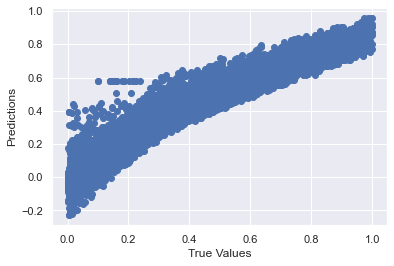

In [1172]:
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import PolynomialFeatures

cinema["features"] = scaled_df[['ticket_price', 'show_time',  'occu_perc', 'capacity', 'quarter', 'month' , 'day']]
cinema["target"] = scaled_df['total_sales']

x_train, x_test, y_train, y_test = train_test_split(cinema['features'], cinema['target'], test_size=0.3)

poly_reg2 = PolynomialFeatures(degree=2)

x_poly = poly_reg2.fit_transform(cinema['features'])

regressor = LinearRegression()

regressor.fit(x_poly, cinema['target'])

y_pred = regressor.predict(poly_reg2.fit_transform(x_test))


print('score: ', regressor.score(poly_reg2.fit_transform(x_test), y_test))

print('Coefficients: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)

print('Mean squared error: %f' % mean_squared_error(y_test, y_pred)) # dif entre valor predito e valor real elevar ao quadrado, soma todos os erros e divide pelo numero de amotras
print('Mean absolute error: %f' % mean_absolute_error(y_test, y_pred)) # quanto que em media o modelo esta errando o valor do total de sales
print('Root Mean squared error: %f' %(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 score: %f' % r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


#### Polinomial grau 3

score:  0.9962354396280872
Coefficients:  [ 1.85478134e+01  1.69352583e-02 -2.34321354e-02  3.29458410e-02
  3.97502418e-02  5.11232231e+03 -5.11233574e+03 -1.08878462e-02
 -3.75735937e-02  6.54910160e-02  2.90443208e-03 -7.17988361e-02
 -6.20869600e-03  2.62072524e-02  6.35378899e-03 -1.97993638e-02
  4.74725809e-02  9.77452957e-02 -1.17806962e-03 -2.31370791e-02
 -2.44116238e-02 -4.55428158e-02 -2.19446393e-01  1.05404362e-02
  4.00042101e-03  1.12266844e-02 -7.98362870e-02  3.11621492e-03
  1.78497864e-02  2.43094957e-02 -3.73304872e-02  7.89384137e-02
  2.01763128e-02 -3.34194602e-02 -8.35098178e-03  1.07801879e-02
  1.90655356e-02 -1.14729268e-02  5.35455976e-03  1.24213737e-02
 -8.92195100e-03  1.48814073e-02  2.25907493e-03 -2.17747460e-02
  1.98588477e-02  3.32172174e-02  2.07404491e-02 -9.10064200e-02
 -1.00939799e-03  1.87053004e-02  8.39553299e+00 -1.27564305e-02
  3.26438822e-02 -2.80574028e-03 -3.05062634e-03 -2.79857120e-02
  1.12629455e-01  4.28004208e-04 -1.02796809e-01

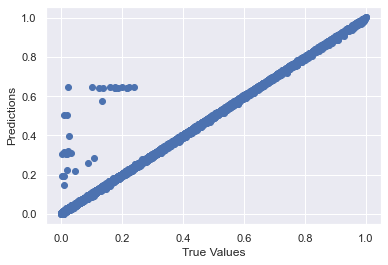

In [1173]:
x_train, x_test, y_train, y_test = train_test_split(cinema['features'], cinema['target'], test_size=0.3)

poly_reg4 = PolynomialFeatures(degree=3)

x_poly = poly_reg4.fit_transform(cinema['features'])

regressor = LinearRegression()

regressor.fit(x_poly, cinema['target'])

y_pred = regressor.predict(poly_reg4.fit_transform(x_test))


print('score: ', regressor.score(poly_reg4.fit_transform(x_test), y_test))

print('Coefficients: ', regressor.coef_)
print('Intercept: ', regressor.intercept_)

print('Mean squared error: %f' % mean_squared_error(y_test, y_pred)) # dif entre valor predito e valor real elevar ao quadrado, soma todos os erros e divide pelo numero de amotras
print('Mean absolute error: %f' % mean_absolute_error(y_test, y_pred)) # quanto que em media o modelo esta errando o valor do total de sales
print('Root Mean squared error: %f' %(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 score: %f' % r2_score(y_test, y_pred))

plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

Text(0.5, 1.0, 'MSE VS Grau')

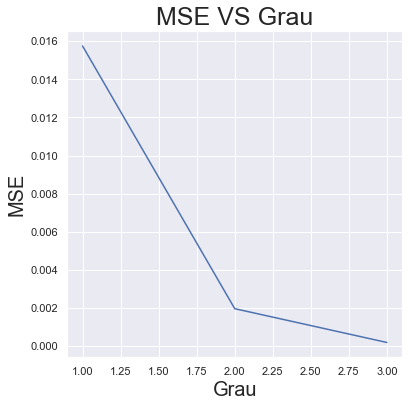

In [1174]:
from sklearn.model_selection import cross_validate

x_train, x_test, y_train, y_test = train_test_split(cinema['features'], cinema['target'], test_size=0.3)

maxdegree=4
training_error=[]
cross_validation_error=[]
for d in range(1,maxdegree):
    x_poly_train=PolynomialFeatures(degree=d).fit_transform(x_train)
    x_poly_test=PolynomialFeatures(degree=d).fit_transform(x_test)
    lr=LinearRegression(fit_intercept=False)
    model=model.fit(x_poly_train,y_train)
    y_train_pred=model.predict(x_poly_train)
    mse_train=mean_squared_error(y_train,y_train_pred)
    cve=cross_validate(lr,x_poly_train,y_train,scoring='neg_mean_squared_error',cv=5,return_train_score=True)
    training_error.append(mse_train)
    cross_validation_error.append(np.mean(np.absolute(cve['test_score'])))
    
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(range(1,maxdegree),cross_validation_error)
ax.set_xlabel('Grau',fontsize=20)
ax.set_ylabel('MSE',fontsize=20)
ax.set_title('MSE VS Grau',fontsize=25)